In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, SVR  # SVC stands for Support Vector Classifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score, brier_score_loss
import numpy as np

sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import hopsworks
import pandas as pd

/u/11/zhangz13/unix/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# from sklearn.neighbors import KNeighborsClassifier
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from matplotlib import pyplot
from hsml.schema import Schema
from hsml.model_schema import ModelSchema
import joblib
import os

In [4]:
api = '151p8WWCoctBzBeg.wRj1VwLA6wwjCS2aG7A51NsbhEbqVZ35wLl5g03b85EeetLKtpsO9bDOjy8DR2O3'
project = hopsworks.login(api_key_value = api)
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/229528
Connected. Call `.close()` to terminate connection gracefully.


In [5]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv")
sorted_wine_df = wine_df.sort_values(by='quality')
wine_df['quality'].value_counts()
sorted_wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
740,white,6.9,0.39,0.40,4.6,0.022,5.0,19.0,0.99150,3.31,0.37,12.60,3
2373,white,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.40,3
1931,white,7.1,0.49,0.22,2.0,0.047,146.5,307.5,0.99240,3.24,0.37,11.00,3
2050,white,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.99970,2.93,0.55,9.70,3
6403,red,6.7,0.76,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,white,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.40,9
1605,white,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.90,9
820,white,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.40,9
876,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.70,9


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your data
# Replace this with the path to your dataset

# Assuming the target variable is 'quality' and should be excluded from PCA
wine_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv")
wine_df = wine_df.drop('type', axis=1)
# For numerical columns
wine_df['citric acid'].fillna(wine_df['fixed acidity'].mean(), inplace=True)
wine_df['residual sugar'].fillna(wine_df['volatile acidity'].mean(), inplace=True)
wine_df['chlorides'].fillna(wine_df['volatile acidity'].mean(), inplace=True)
wine_df['pH'].fillna(wine_df['volatile acidity'].mean(), inplace=True)
wine_df['sulphates'].fillna(wine_df['volatile acidity'].mean(), inplace=True)
wine_df['fixed acidity'].fillna(wine_df['fixed acidity'].mean(), inplace=True)
wine_df['volatile acidity'].fillna(wine_df['volatile acidity'].mean(), inplace=True)
# For categorical columns
missing_values = wine_df.isnull().sum()
print(missing_values)
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']
print("quality:",y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=5)  # You can choose the number of components
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Concatenate with the target variable if needed
final_df = pd.concat([pca_df, y], axis=1)

# Explained variance can help you decide how many components to keep
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")
final_df

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
quality: 0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64
Explained Variance: [0.27055377 0.22347781 0.12537509 0.08902906 0.06887062]


,PC1,PC2,PC3,PC4,PC5,quality
0,2.529764,3.220740,-0.378315,-1.060169,0.732607,6
1,-0.069794,-0.474559,-0.404037,0.002539,0.152419,6
2,0.126806,0.331466,0.381767,-0.344187,0.702737,6
3,1.774331,0.726525,-0.193329,-0.075747,-0.187612,6
4,1.774331,0.726525,-0.193329,-0.075747,-0.187612,6
...,...,...,...,...,...,...
6492,-1.913468,-0.411261,-2.001743,0.299174,-0.503703,5
6493,-0.854697,-1.215218,-2.165357,-0.305062,0.308314,6
6494,-2.054054,-0.366935,-1.414092,0.929424,-0.203176,6
6495,-2.166170,-0.243362,-2.390466,1.049441,-0.022860,5


In [7]:
from sklearn.preprocessing import LabelEncoder
bins = (1, 5.5, 7.5, 10 )
group_names = ['bad', 'good', 'premium']
wine_df['quality'] = pd.cut(wine_df['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
wine_df['quality'] = label_quality.fit_transform(wine_df['quality'])
wine_df['quality'].value_counts()


quality
1    3915
0    2384
2     198
Name: count, dtype: int64

In [9]:
wine_df.info()
wine_df['quality'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


quality
1    3915
0    2384
2     198
Name: count, dtype: int64

In [ ]:
missing_values = wine_df.isnull().sum()
print(missing_values)

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [10]:
# For numerical columns
wine_df['citric acid'].fillna(wine_df['fixed acidity'].mean(), inplace=True)
wine_df['residual sugar'].fillna(wine_df['volatile acidity'].mean(), inplace=True)
wine_df['chlorides'].fillna(wine_df['volatile acidity'].mean(), inplace=True)
wine_df['pH'].fillna(wine_df['volatile acidity'].mean(), inplace=True)
wine_df['sulphates'].fillna(wine_df['volatile acidity'].mean(), inplace=True)
wine_df['fixed acidity'].fillna(wine_df['fixed acidity'].mean(), inplace=True)
wine_df['volatile acidity'].fillna(wine_df['volatile acidity'].mean(), inplace=True)
# For categorical columns
missing_values = wine_df.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [12]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality'] # Binary classification: premium (True) or not (False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
## Logistic Regression
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(50,100,200),  
                         max_iter=20000,)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.703846   0.715619  0.703846  0.698555


In [16]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l2',max_iter=15000 )
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

from sklearn.metrics import confusion_matrix
from io import BytesIO
from PIL import Image
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Convert the matplotlib plot to a PIL Image
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    img = Image.open(buf)
    return img
img = plot_confusion_matrix(y_test, y_pred)
print("type of img:",type(img))

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.716923   0.695313  0.716923   0.70437
type of img: <class 'PIL.PngImagePlugin.PngImageFile'>


In [17]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(model_results)

          Model  Accuracy  Precision    Recall  F1 Score
0  SVM (Linear)  0.726154   0.704651  0.726154   0.71363


In [18]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 150,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
print("y_pred max is:",y_train.max())
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


print(model_results)
importance = classifier.feature_importances_
# sort features by importance
sorted_indices = np.argsort(importance)[::-1]
for idx in sorted_indices:
    print(f'Feature: {X.columns[idx]}, Score: {importance[idx]:.5f}')

y_pred max is: 2
                   Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest (n=100)  0.826923   0.829359  0.826923  0.821533
Feature: alcohol, Score: 0.14751
Feature: volatile acidity, Score: 0.10391
Feature: density, Score: 0.10334
Feature: free sulfur dioxide, Score: 0.08612
Feature: total sulfur dioxide, Score: 0.08534
Feature: chlorides, Score: 0.08388
Feature: sulphates, Score: 0.08296
Feature: residual sugar, Score: 0.08158
Feature: citric acid, Score: 0.08018
Feature: pH, Score: 0.07421
Feature: fixed acidity, Score: 0.07096


### Exploratory Data Analysis (EDA)  our Iris Data

Let's look at our iris flower - the distribution and range of values for the 4 different features
 * sepal_length
 * sepal_width
 * petal_length
 * petal_width
 
 and the target variable is `variety`.

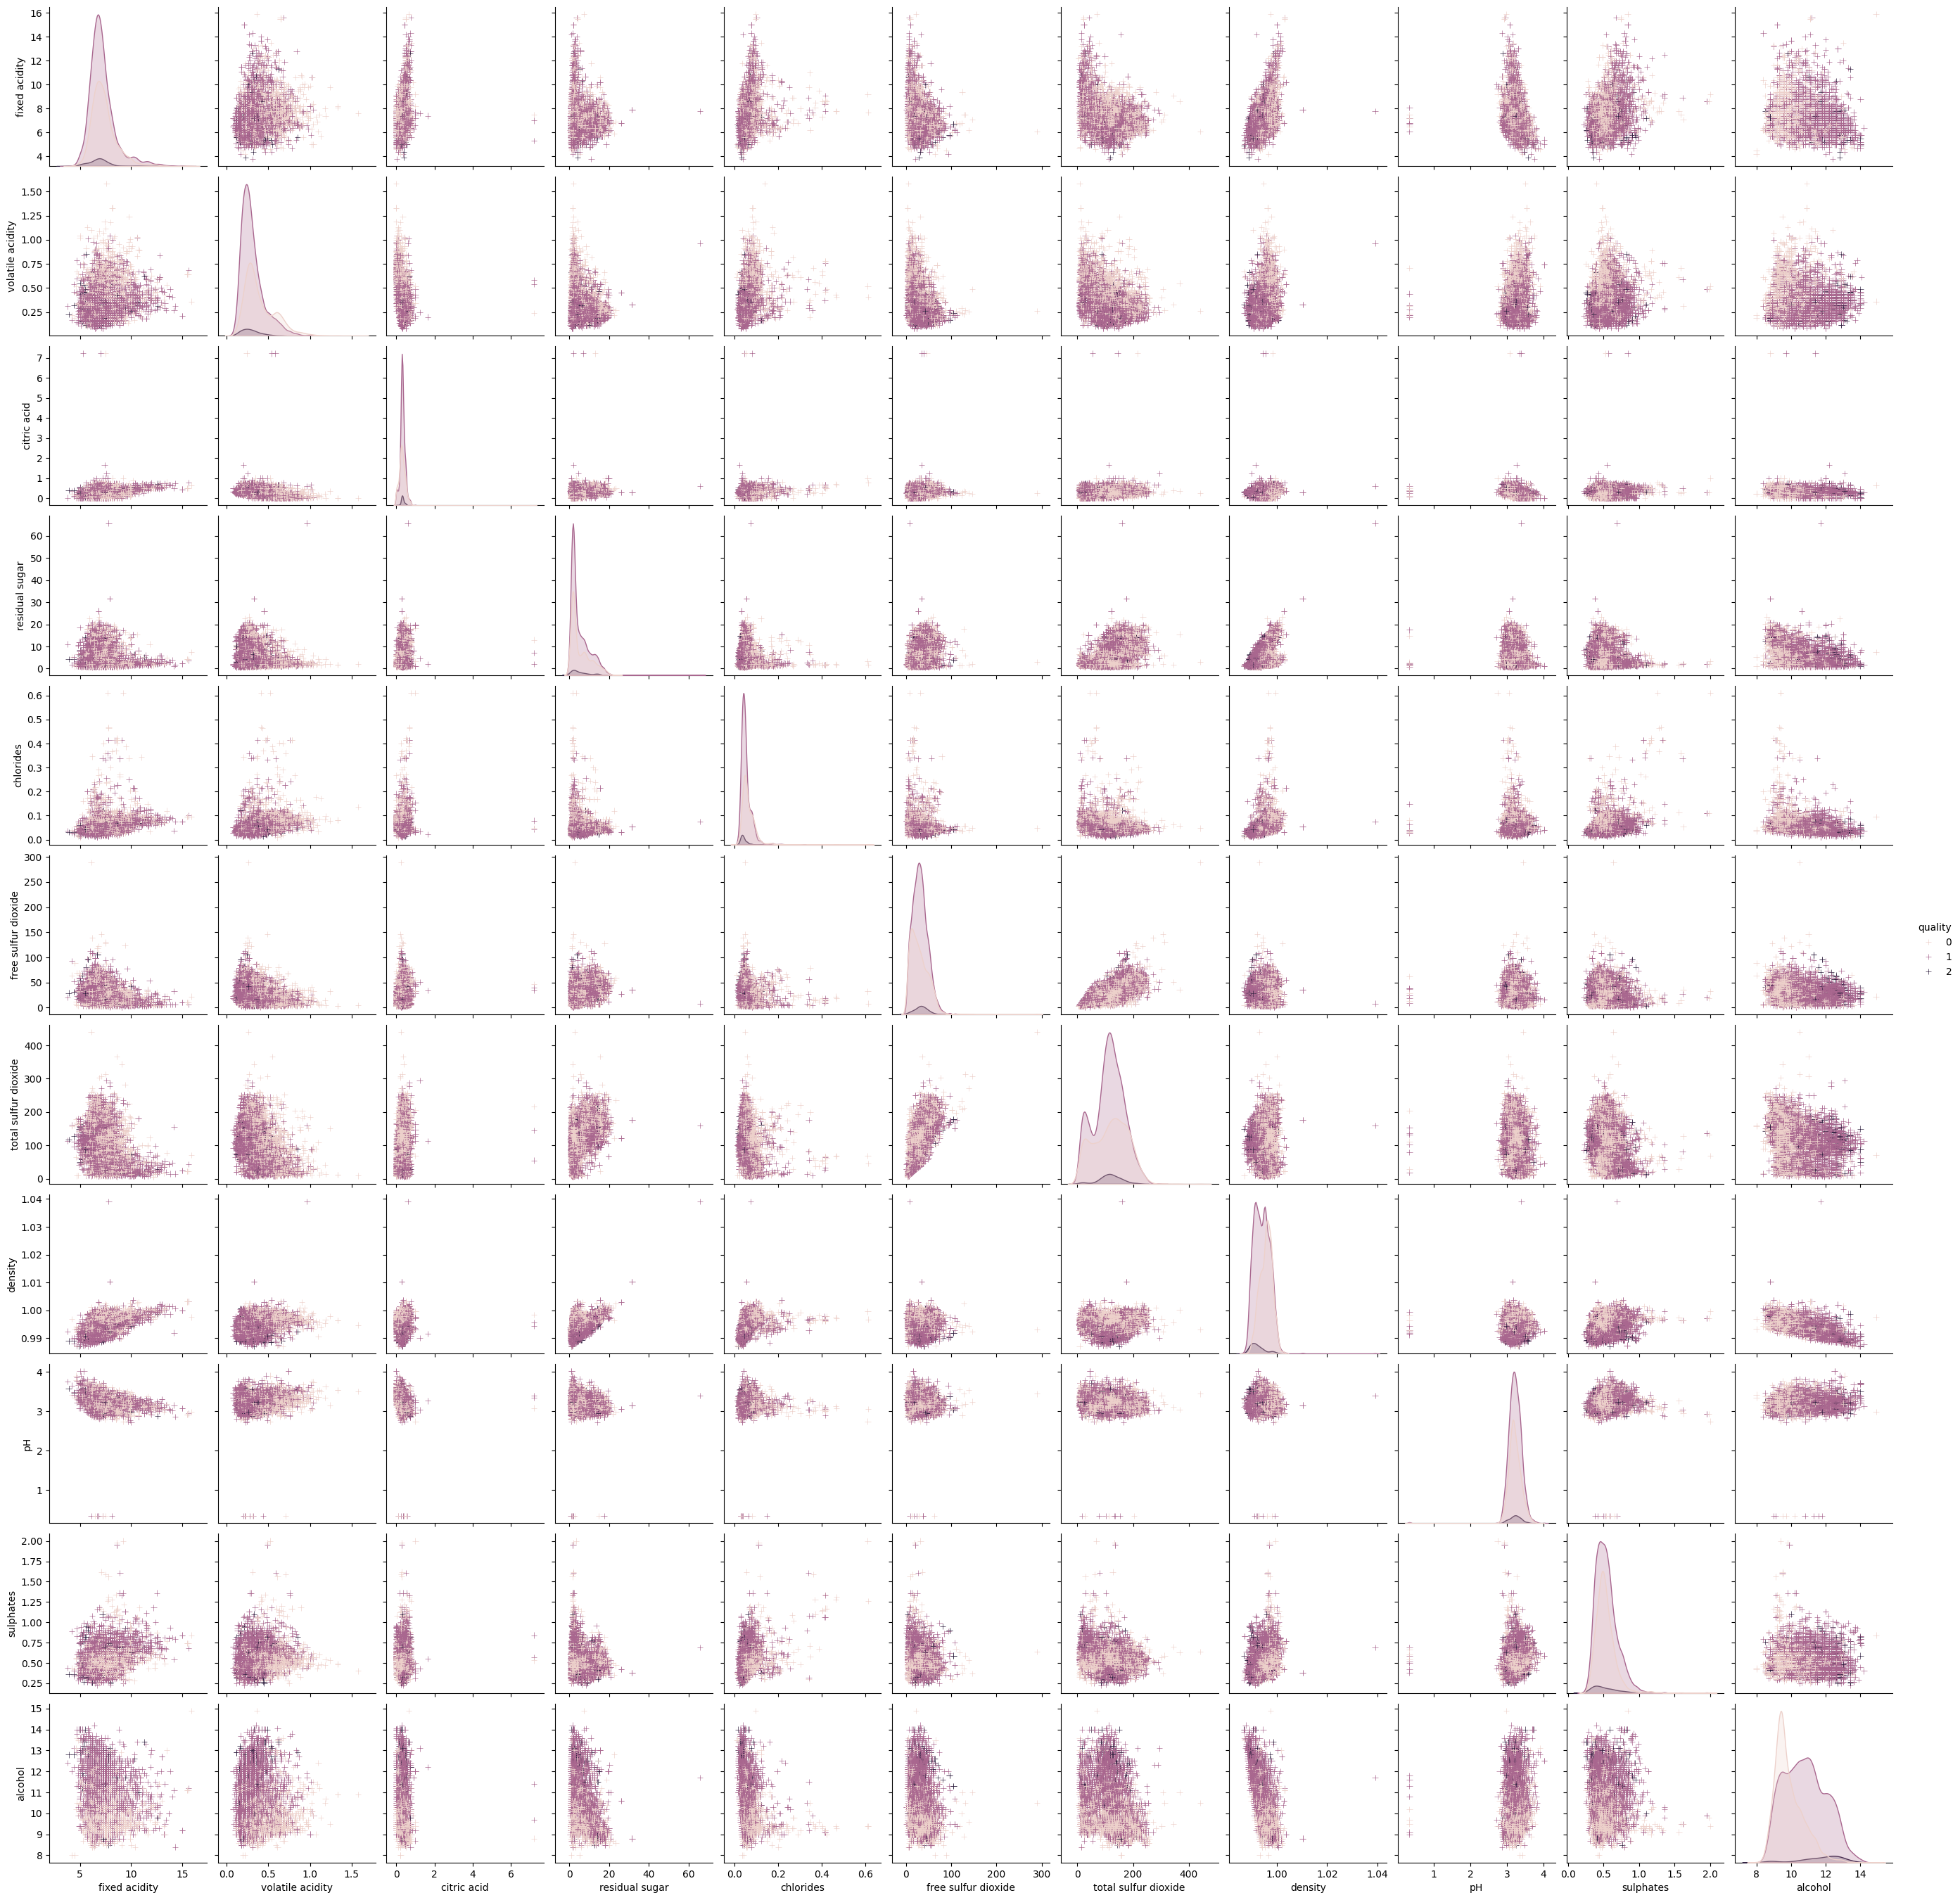

In [19]:
g = sns.pairplot(wine_df, hue='quality', markers='+')
plt.show()

### Visualize range of values 

We want to design a simulator generate the 3 types of iris flower (setosa, versicolor, virginica).
To do this, we can visualize the range of values for the length and width of the sepal and petal for each of the 3 flowers.

2023-11-22 13:52:06,626 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-22 13:52:06,633 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


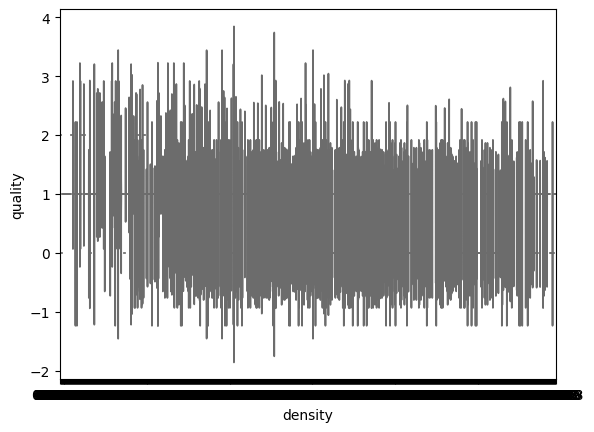

2023-11-22 13:52:24,170 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-22 13:52:24,176 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


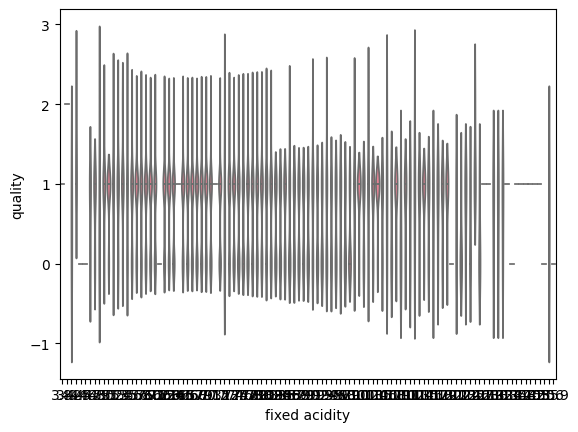

2023-11-22 13:52:25,390 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-22 13:52:25,396 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


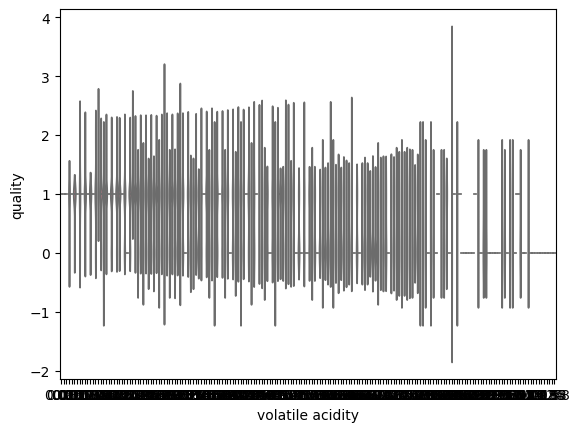

2023-11-22 13:52:26,973 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-22 13:52:26,978 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


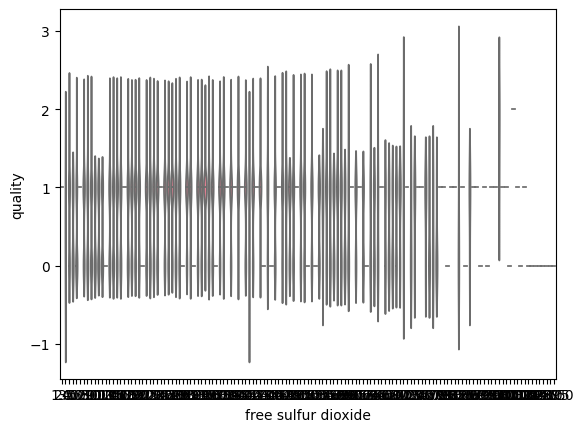

In [20]:
g = sns.violinplot(y='quality', x='density', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='quality', x='fixed acidity', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='quality', x='volatile acidity', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='quality', x='free sulfur dioxide', data=wine_df, inner='quartile')
plt.show()

### Insert our Iris DataFrame into a FeatureGroup
Let's write our historical iris feature values and labels to a feature group.
When you write historical data, this process is called `backfilling`.

In [21]:

wine_df.columns = wine_df.columns.str.replace(' ', '_')
wine_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.339691,11.2,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,0


In [24]:
wine_fg = fs.get_or_create_feature_group(
    name="wine_2",
    version=1,
    primary_key=["fixed_acidity","volatile_acidity","citric_acid", "residual_sugar"	,"chlorides",	
                 "free_sulfur_dioxide",	"total_sulfur_dioxide",	"density","pH","sulphates","alcohol","quality"], 
    description="Wine Quality dataset_final")
wine_fg.insert(wine_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/229528/fs/229447/fg/245098


Uploading Dataframe: 100.00% |██████████| Rows 6497/6497 | Elapsed Time: 00:06 | Remaining Time: 00:00


Launching job: wine_2_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/229528/jobs/named/wine_2_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7f244957bac0>, None)

### Data Validation
If you want, you can enable data validation for your feature group.
The code below will prevent iris flower data from being written your your feature group if you write values outside the expected ranges.

In [25]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [26]:
suite = ExpectationSuite(expectation_suite_name="wine_dimensions")
expect(suite, "fixed_acidity", 3.5, 16)
expect(suite, "volatile_acidity", 0.06,1.6)
expect(suite, "citric_acid", 0,7.5)
expect(suite, "residual_sugar", 0.3,66)
expect(suite, "chlorides", 0,0.65)
expect(suite, "free_sulfur_dioxide", 0.8,290)
expect(suite, "total_sulfur_dioxide", 5.5,450)
expect(suite, "density", 0.95,1.03)
expect(suite, "ph", 0.3,4.5)
expect(suite, "sulphates", 0.2, 2.5)
expect(suite, "alcohol", 7.8, 15.5)
expect(suite, "quality", 0,2)
wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")    

Attached expectation suite to Feature Group, edit it at https://c.app.hopsworks.ai:443/p/229528/fs/229447/fg/245098


In [26]:
# import pandas as pd
# from great_expectations.dataset import PandasDataset
# wine_fg = fs.get_or_create_feature_group(
#     name="wine_2",
#     version=3,
#     primary_key=["fixed_acidity","volatile_acidity","citric_acid", "residual_sugar"	,"chlorides",	
#                  "free_sulfur_dioxide",	"total_sulfur_dioxide",	"density","pH","sulphates","alcohol","quality"], 
#     description="Wine Quality dataset_2")
# # Creating new data
# new_data = {
#     "fixed_acidity": [5.01],  # example values
#     "volatile_acidity": [0.51],
#     "citric_acid": [0.3],
#     "residual_sugar":[0.51],
#     "chlorides":[0.55],
#     "free_sulfur_dioxide":[30.0],
#     "total_sulfur_dioxide":[35.0],
#     "density":[0.9856],
#     "ph":[3.12],
#     "sulphates":[1.312],
#     "alcohol":[11.3121],
#     "quality":[1]
# }
# new_df = pd.DataFrame(new_data)

# # Convert the DataFrame to a Great Expectations Dataset
# new_ge_df = PandasDataset(new_df)

# # Validate against the expectations
# results = new_ge_df.validate(expectation_suite=suite, result_format="SUMMARY")

# # Check if the new data meets the expectations
# if results["success"]:
#     wine_fg.insert(new_df)
#         # new_df,
#         # overwrite=False,  # Set to True if you want to overwrite existing data
#         # operation="append",  # Choose between "insert", "upsert", or "append"
#         # Specify other parameters if needed
# else:
#     print("Data validation failed:", results)




2023-11-20 22:47:45,171 INFO: 	12 expectation(s) included in expectation_suite.
Validation succeeded.
Validation Report saved successfully, explore a summary at https://c.app.hopsworks.ai:443/p/229529/fs/229448/fg/240003


Uploading Dataframe: 100.00% |██████████| Rows 1/1 | Elapsed Time: 00:07 | Remaining Time: 00:00


Launching job: wine_2_3_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/229529/jobs/named/wine_2_3_offline_fg_materialization/executions
